## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [5]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

### 3.7 Exploring Data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [15]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count() #math_full is a count of the number of students who scored a perfect 100 on the math test and for whom the average score is not null.

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [17]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

histplot is a function provided by the Seaborn library in Python that is used to create histograms. A histogram is a graphical representation of the distribution of a dataset. It partitions the data into intervals called "bins" and represents the frequency or count of data points falling into each bin by the height of a bar. histplot can also overlay a kernel density estimate (KDE) on top of the histogram to show the underlying distribution of the data.

The kde parameter in histplot is a boolean value that determines whether to display the KDE or not. If it is set to True, the function will overlay a KDE curve on top of the histogram. The KDE represents a smooth estimate of the distribution of the data and can be useful for identifying patterns that may not be visible in the histogram alone.

The hue parameter in histplot is used to group the data by a categorical variable and display separate histograms for each category. In the example code provided, the hue parameter is set to 'gender' to create two separate histograms, one for males and one for females, side-by-side.

n a Seaborn histogram plot created using histplot, the y-axis typically represents the count or frequency of data points falling into each bin on the x-axis. The exact interpretation of the y-axis depends on the type of histogram being plotted.

In the case of a regular histogram (i.e., when kde is set to False), the y-axis shows the count or frequency of data points that fall into each bin. For example, if the x-axis represents the scores of students in an exam and there are 5 bins with equal width, then the y-axis would show the number of students who scored in each bin.

If the kde parameter is set to True, the y-axis represents the density of the data points rather than the count. The area under the KDE curve represents the probability density of the data, and the y-axis values at any given point on the curve represent the relative likelihood of observing data points in that region.

In summary, the y-axis of a Seaborn histogram plot created using histplot typically represents either the count or the density of data points, depending on whether kde is set to False or True.

Overall, histplot is useful when we want to visualize the distribution of a dataset and identify patterns in the data. The kde and hue parameters can provide additional insights into the distribution of the data and help us to understand how different groups within the dataset are distributed.

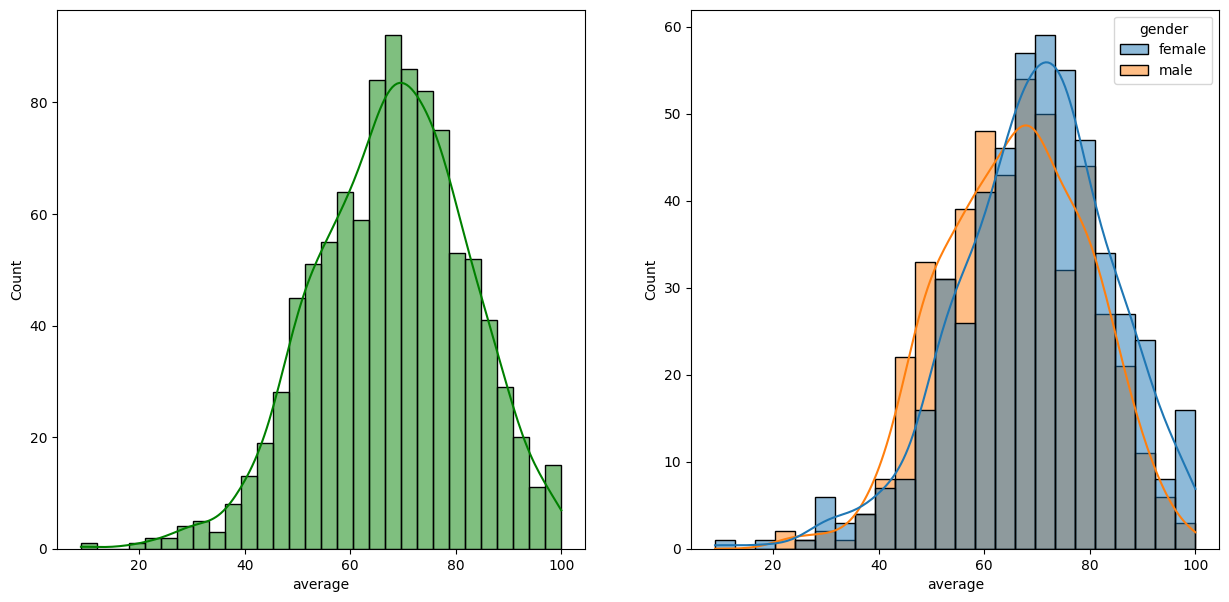

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7)) #  The arguments '1, 2' specify that the figure should have one row and two columns of subplots. 
plt.subplot(121)         
sns.histplot(data=df,x='average',bins=30,kde=True,color='g') #The 'data' argument specifies the DataFrame 'df' to use, the 'x' argument specifies the column to plot on the x-axis, and the 'bins' argument sets the number of bins to use for the histogram. The 'kde' argument sets whether to overlay a kernel density estimate on top of the histogram, and the 'color' argument sets the color of the bars in the histogram.
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender') #The second subplot is selected with 'plt.subplot(122)', and another histogram is plotted using 'histplot', but this time the 'hue' argument is used to group the data by the 'gender' column. This creates two histograms side-by-side, one for males and one for females, each with their own color.
plt.show()

In summary, this code creates a figure with two histograms of the 'average' column of the DataFrame 'df'. The first histogram shows the distribution of the column, while the second histogram shows the distribution of the column split by gender.

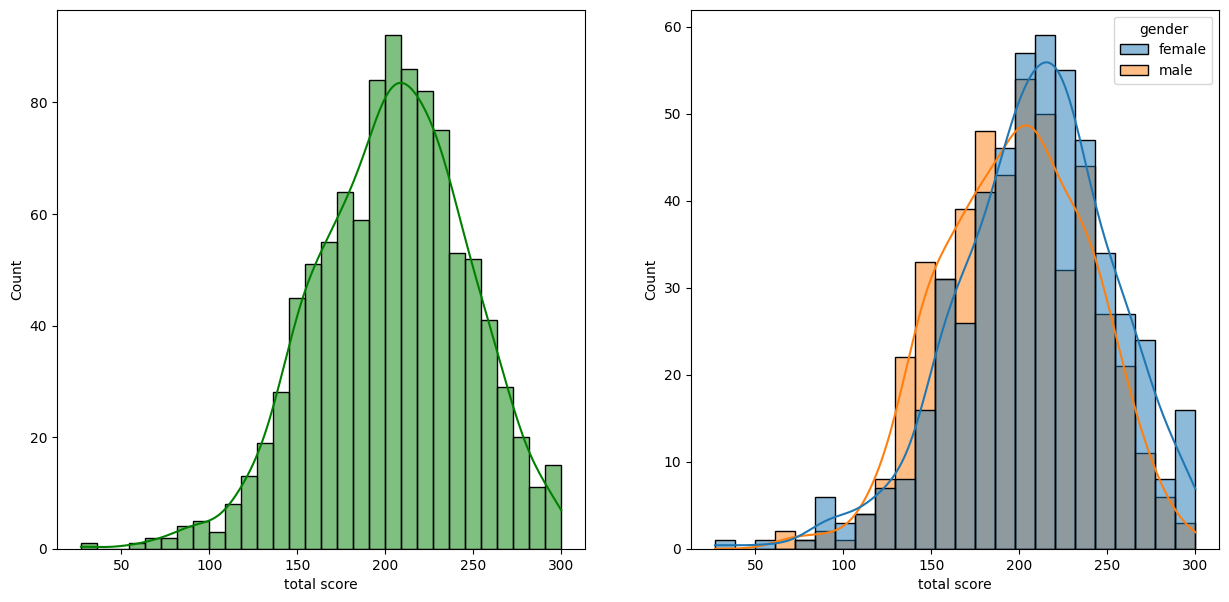

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

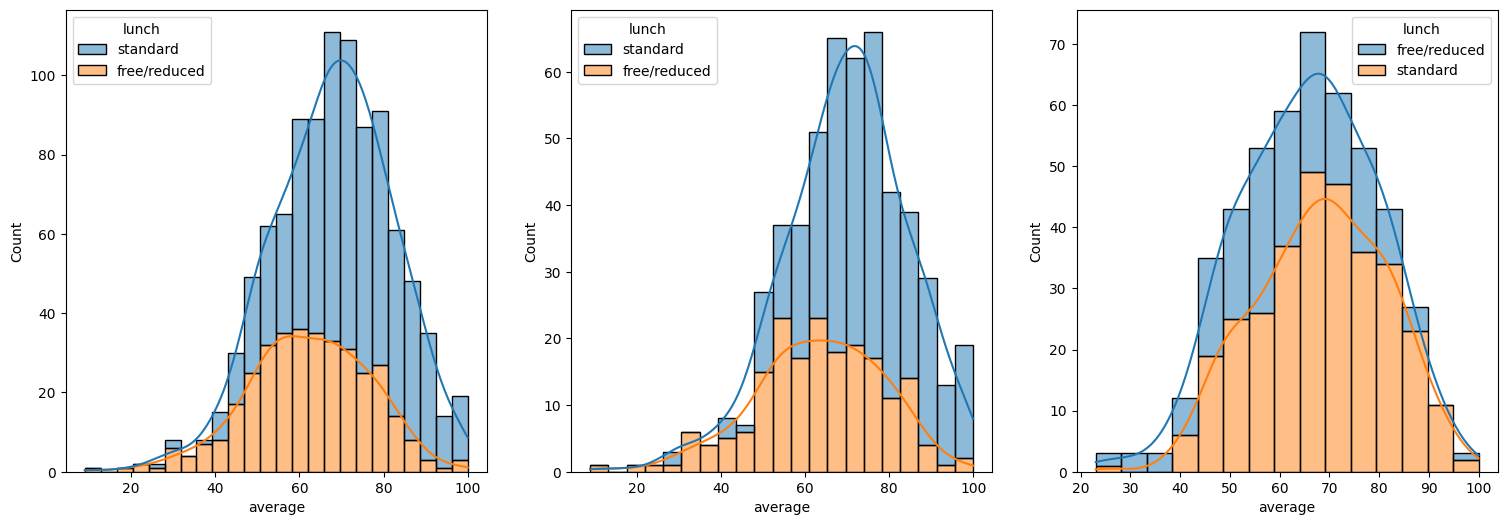

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch',multiple="stack")
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch',multiple="stack")
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch',multiple="stack")
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

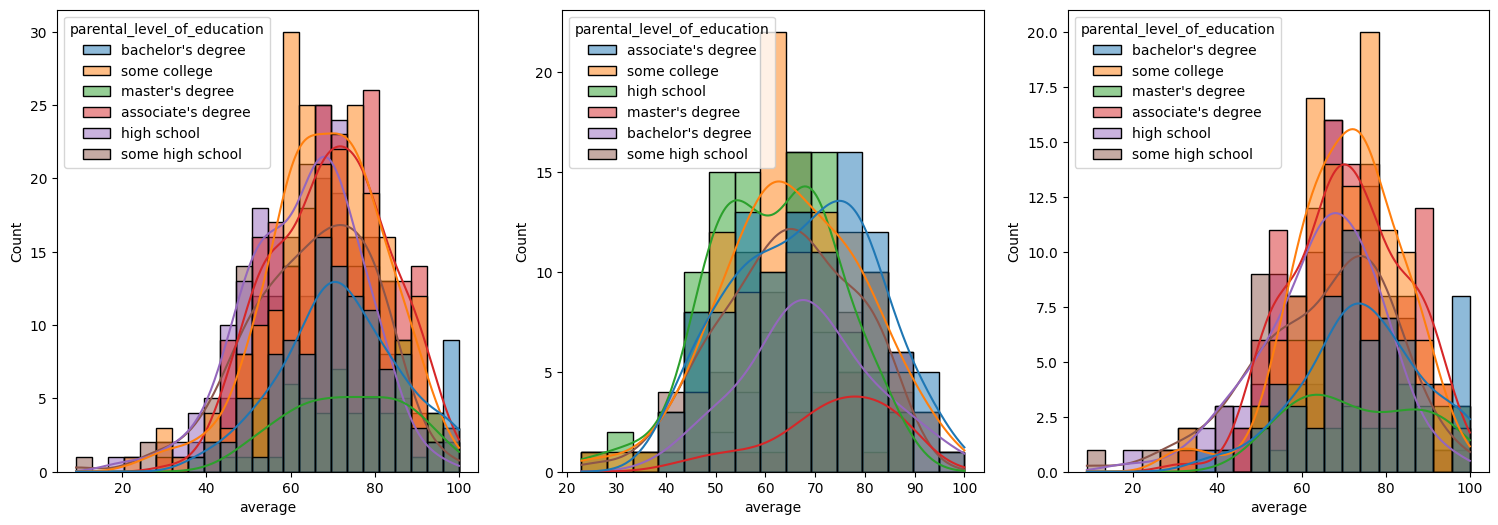

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

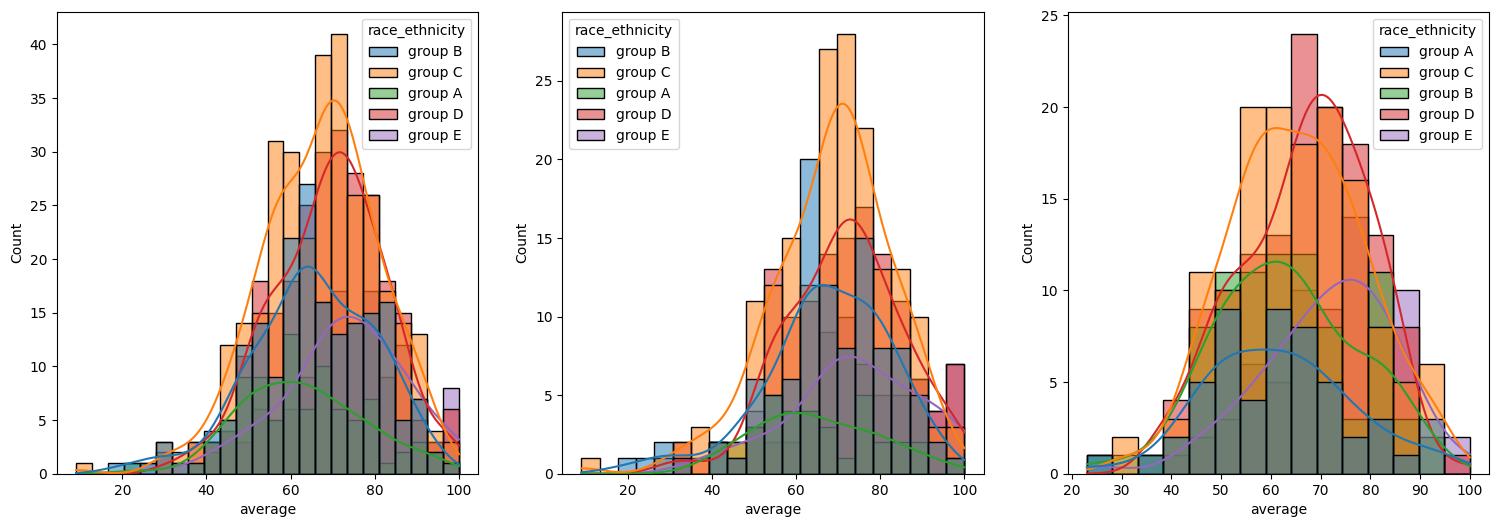

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

A violin plot is a type of statistical visualization that shows the distribution of a dataset. It is similar to a box plot, but instead of showing summary statistics like the minimum, maximum, median, and quartiles, it shows the full distribution of the data. A violin plot consists of a kernel density estimate (KDE) of the data, mirrored and joined at the center, with the width of the "violin" representing the density of the data at that point. The shape of the violin can provide information about the skewness and kurtosis of the distribution.

In a violin plot, the y-axis typically represents the values of the variable being plotted (in this case, the math scores of students in the DataFrame 'df'). The x-axis shows the categories or groups being compared (if any).

To interpret a violin plot, we can look for patterns in the distribution of the data. For example, we can look for differences in the median or overall shape of the violins between different groups or categories. We can also look for evidence of skewness, bimodality, or outliers in the distribution.

Kurtosis and skewness are both concepts used in statistics to describe the shape of a distribution of data.

Skewness refers to the extent to which a distribution of data is not symmetrical. Imagine a line drawn through the middle of a graph that represents the distribution of data. If the line is placed exactly in the middle and the data is equally distributed on either side, the distribution is said to be perfectly symmetrical and has no skewness. If the line is shifted towards one side, the distribution is said to be skewed. For example, a distribution of test scores that is skewed to the left means that there are more students with lower scores than higher scores.

Kurtosis refers to the extent to which a distribution of data has a "peaked" shape or not. A distribution with high kurtosis is more peaked than a distribution with low kurtosis. A distribution with low kurtosis is flatter and more spread out. Imagine a line drawn through the middle of a graph that represents the distribution of data. If the line is drawn through the center of the peak, the distribution is said to have normal kurtosis. If the line is drawn through a flatter section of the distribution, the distribution is said to have low kurtosis. If the line is drawn through a steeply peaked section of the distribution, the distribution is said to have high kurtosis.

In summary, skewness and kurtosis are used to describe the shape of a distribution of data. Skewness refers to whether the distribution is symmetrical or not, and kurtosis refers to whether the distribution is peaked or not.

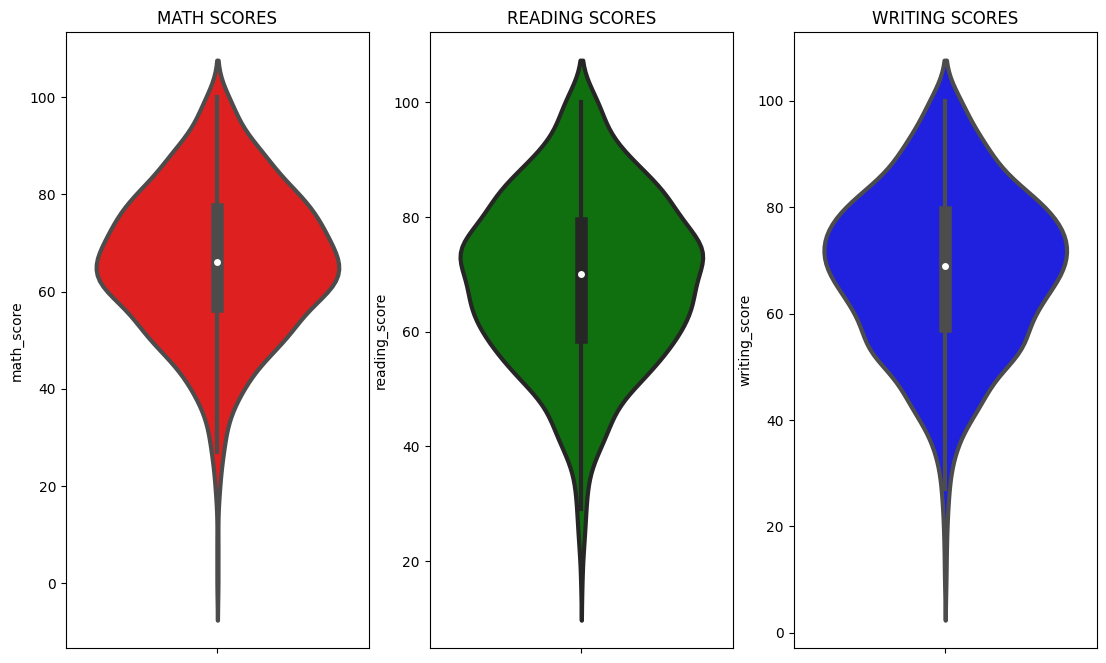

In [25]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

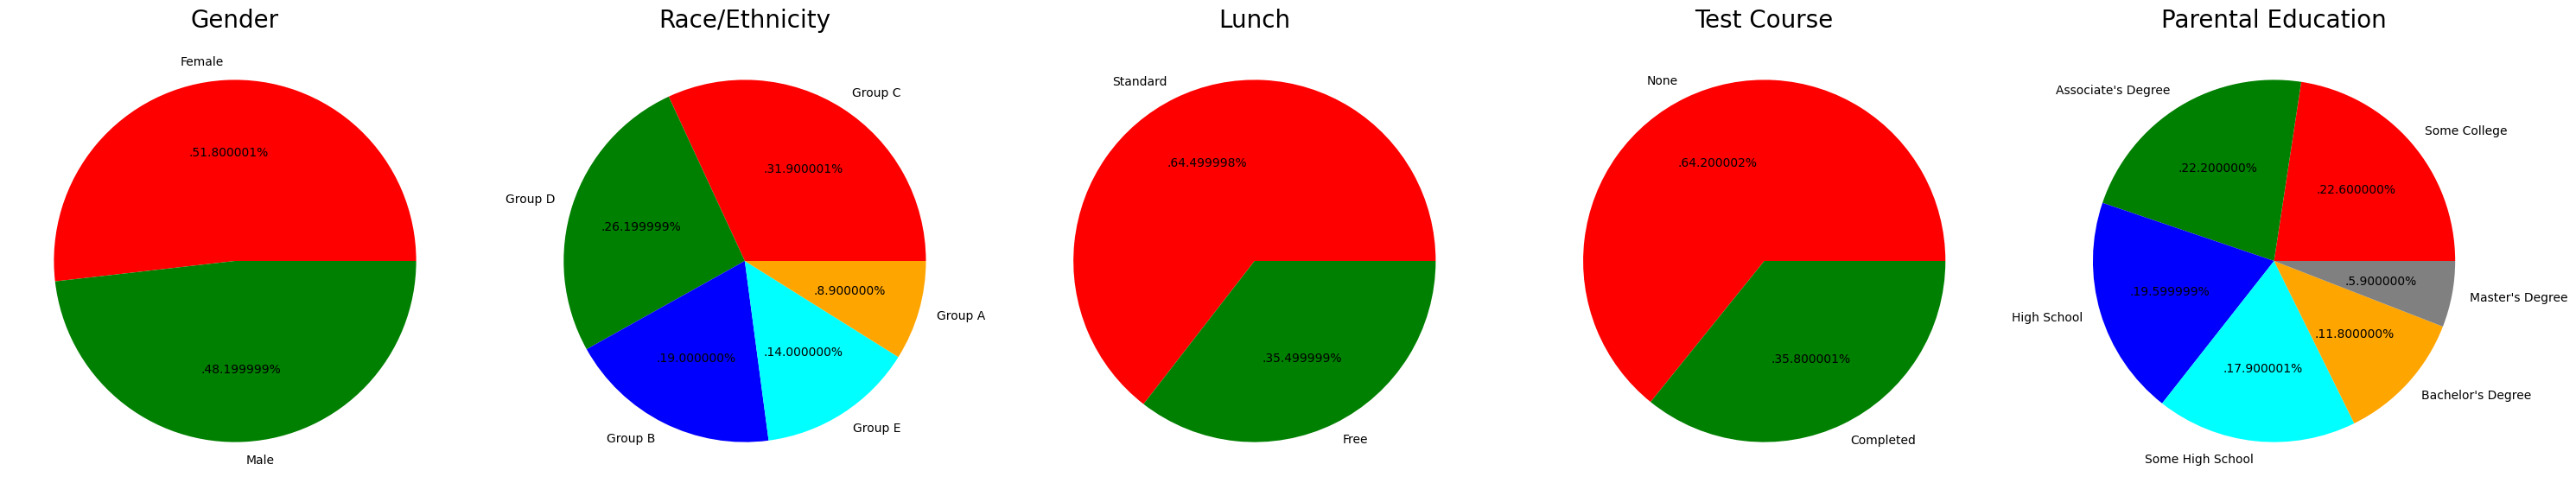

In [26]:
plt.rcParams['figure.figsize'] = (30, 12) #lt.rcParams is a dictionary-like object that stores the default configuration settings for the matplotlib library. These settings determine the default behavior of various plot attributes such as the figure size, line width, font size, and color maps, among others.

plt.subplot(1, 5, 1)  #creates a subplot with 1 row, 5 columns, and selects the first (leftmost) column for the current plot.
size = df['gender'].value_counts() # computes the count of unique values in the 'gender' column of the DataFrame 'df' and stores the result in the 'size' variable.
labels = 'Female', 'Male'  #defines the labels for the pie chart to be 'Female' and 'Male'.
color = ['red','green']  #ets the color of the pie chart slices to be red for female and green for male.


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%') #he 'autopct' parameter formats the percentage of each slice to be displayed on the chart. The .2f specifies that the percentage should be rounded to 2 decimal places, and the %% escapes the percent sign so that it is displayed on the chart.
plt.title('Gender', fontsize = 20) # sets the title of the plot to be 'Gender' with a font size of 20.
plt.axis('off') # turns off the axis labels and ticks for the plot, which is common in pie charts where the focus is on the slices and their labels, rather than the axes.



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

ax[0] is the first subplot in a set of subplots created using plt.subplots() or fig.add_subplot() in matplotlib.

When creating multiple subplots, matplotlib returns an array of Axes objects, with one Axes object per subplot. The objects are arranged in the array in row-major order, so ax[0] refers to the first Axes object in the first row, ax[1] refers to the second Axes object in the first row, and so on.

In the context of the code f,ax=plt.subplots(1,2,figsize=(20,10)), the 1 and 2 arguments passed to plt.subplots() specify that there is one row and two columns of subplots, so ax[0] refers to the first subplot in the left column, while ax[1] refers to the first subplot in the right column.

ax[0].containers is a list of the graphical objects that represent the bars in the bar plot that is drawn on the Axes object at index 0. The containers attribute is a property of the Axes class in matplotlib, and it returns a list of container objects, one for each group of bars. Each container object contains a list of individual bar objects, one for each bar in the group.

ax[0].bar_label is a method of the Axes class in matplotlib that adds labels to the bars in a bar plot. It takes a container argument that specifies the container object representing the group of bars to be labeled, and an optional labels argument that specifies the labels to be added to the bars.

In the code for container in ax[0].containers: ax[0].bar_label(container,color='black',size=20), the for loop iterates over each container object in the list returned by ax[0].containers, and the ax[0].bar_label method is called on each container to add a label to each bar in the container. The color and size arguments set the color and font size of the labels, respectively.

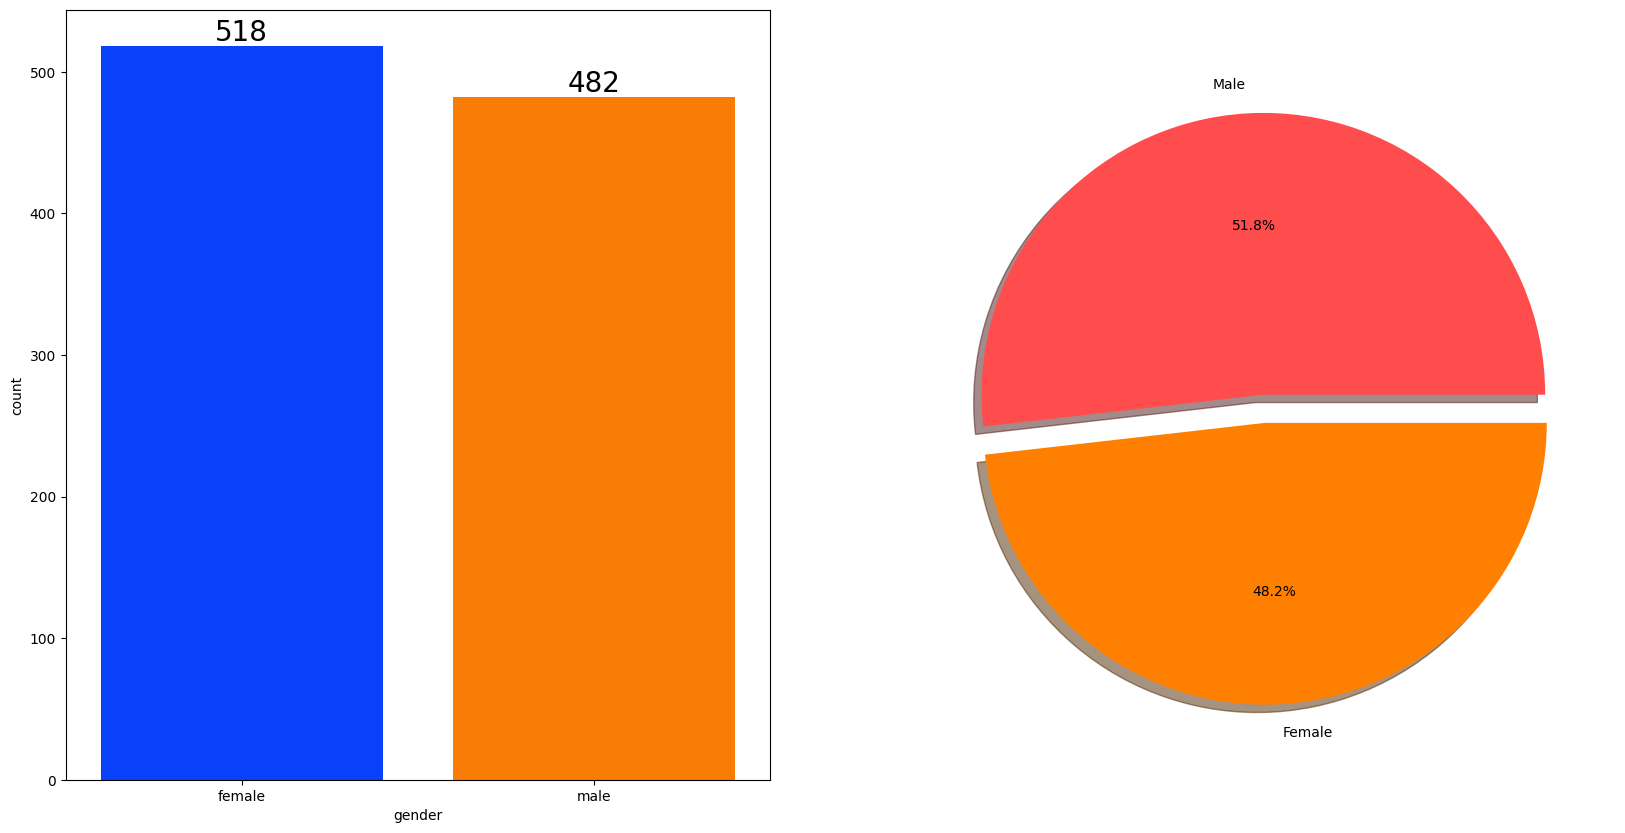

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10)) # The 1 and 2 arguments specify that there is one row and two columns of subplots
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95) #creates a count plot of the 'gender' column in the DataFrame 'df', using the seaborn library. The palette argument sets the color palette for the plot, while the ax argument specifies the subplot to use. The saturation argument controls the intensity of the colors used.
for container in ax[0].containers:  #adds labels to the bars in the count plot created above. The ax[0].containers attribute returns a list of bar containers, and the loop iterates over each container and adds a label to it using the bar_label method. The color argument sets the color of the label text to black, while the size argument sets the font size to 20.
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000']) # creates a pie chart of the counts of male and female values in the 'gender' column of the DataFrame 'df'. The explode argument specifies the amount of the 'Female' slice to be offset from the center of the pie, while the autopct argument sets the format for the percentage labels on the slices. The shadow argument adds a shadow effect to the pie chart, and the colors argument sets the color of each slice.
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [28]:
new_df=df.copy(deep=True)
new_df = new_df.drop(['race_ethnicity','parental_level_of_education','lunch','test_preparation_course','reading_score','writing_score'], axis=1)
new_df.head()

,gender,math_score,total score,average
0,female,72,218,72.666667
1,female,69,247,82.333333
2,female,90,278,92.666667
3,male,47,148,49.333333
4,male,76,229,76.333333


In [29]:
gender_group = new_df.groupby('gender').mean()

In [30]:
gender_group['average'][0]

69.56949806949807

gender_group is likely a Pandas DataFrame object that contains information about students' exam scores, gender, and other details.

gender_group.loc['female', 'average'] selects the value in the row with the index label 'female' and the column with the column label 'average'. This means it retrieves the average score of female students.

Similarly, gender_group.loc['female', 'math_score'] selects the value in the row with the index label 'female' and the column with the column label 'math_score'. This retrieves the math score of female students.

So, the line female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']] creates a list of two values: the average score of female students and the math score of female students. These values will be used in the bar plot to compare the average and math scores of male and female students.

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male') creates a vertical bar plot with bars for male scores.

The first argument X_axis - 0.2 specifies the x-coordinates of the bars. X_axis is an array of integers representing the positions of the x-tick labels, and subtracting 0.2 shifts the bars slightly to the left. This is done to avoid overlapping with the bars for female scores that will be plotted later.

The second argument male_scores specifies the y-coordinates of the bars. male_scores is a list of two values representing the average and math scores of male students.

The third argument 0.4 specifies the width of the bars. The value 0.4 is half the width of the x-tick interval, so the bars don't overlap.

The last argument label = 'Male' provides a label for the bars. This will be used in the legend to distinguish between the bars for male and female scores.

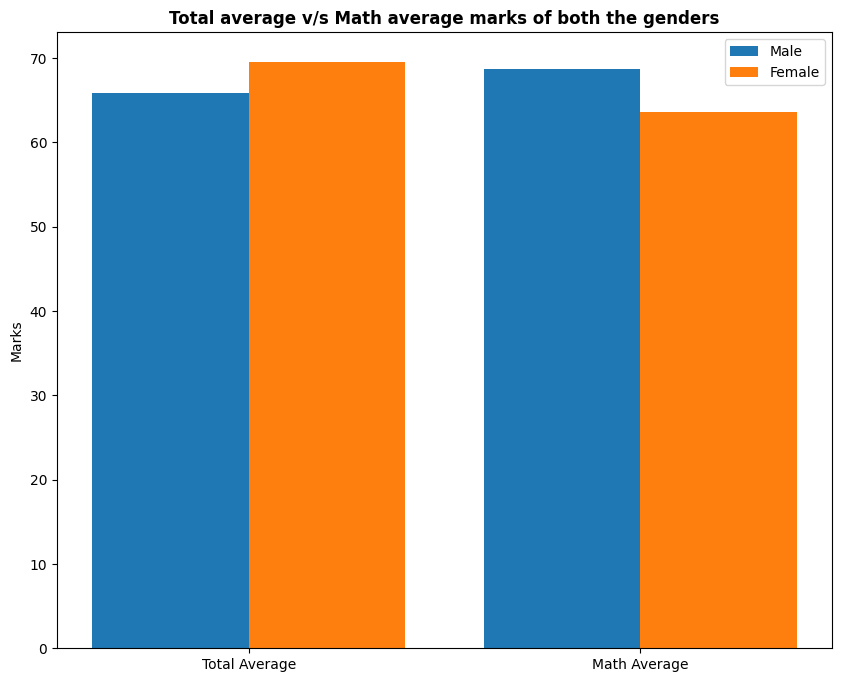

In [31]:
plt.figure(figsize=(10, 8)) #sets the size of the figure that the plot will be drawn on to 10 inches by 8 inches.
X = ['Total Average', 'Math Average'] #defines a list of labels for the X-axis categories.

#define two lists of scores for male and female students, respectively. The scores are obtained from a gender_group DataFrame that contains the average marks of male and female students in each subject.
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]
X_axis = np.arange(len(X))  # creates an array of integers that represent the positions of the X-axis categories.


#create two sets of vertical bars, one for male scores and one for female scores. The first argument specifies the positions of the bars on the X-axis, the second argument specifies the heights of the bars, the third argument specifies the width of the bars, and the label parameter specifies the legend label for the bars.
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X) # sets the tick labels on the X-axis to the values in the X list.
plt.ylabel("Marks") #ets the label for the Y-axis to "Marks".
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold') # sets the title of the plot to "Total average v/s Math average marks of both the genders" and specifies that the font weight of the title should be bold.
plt.legend() #displays a legend for the plot.
plt.show() # displays the plot on the screen.

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

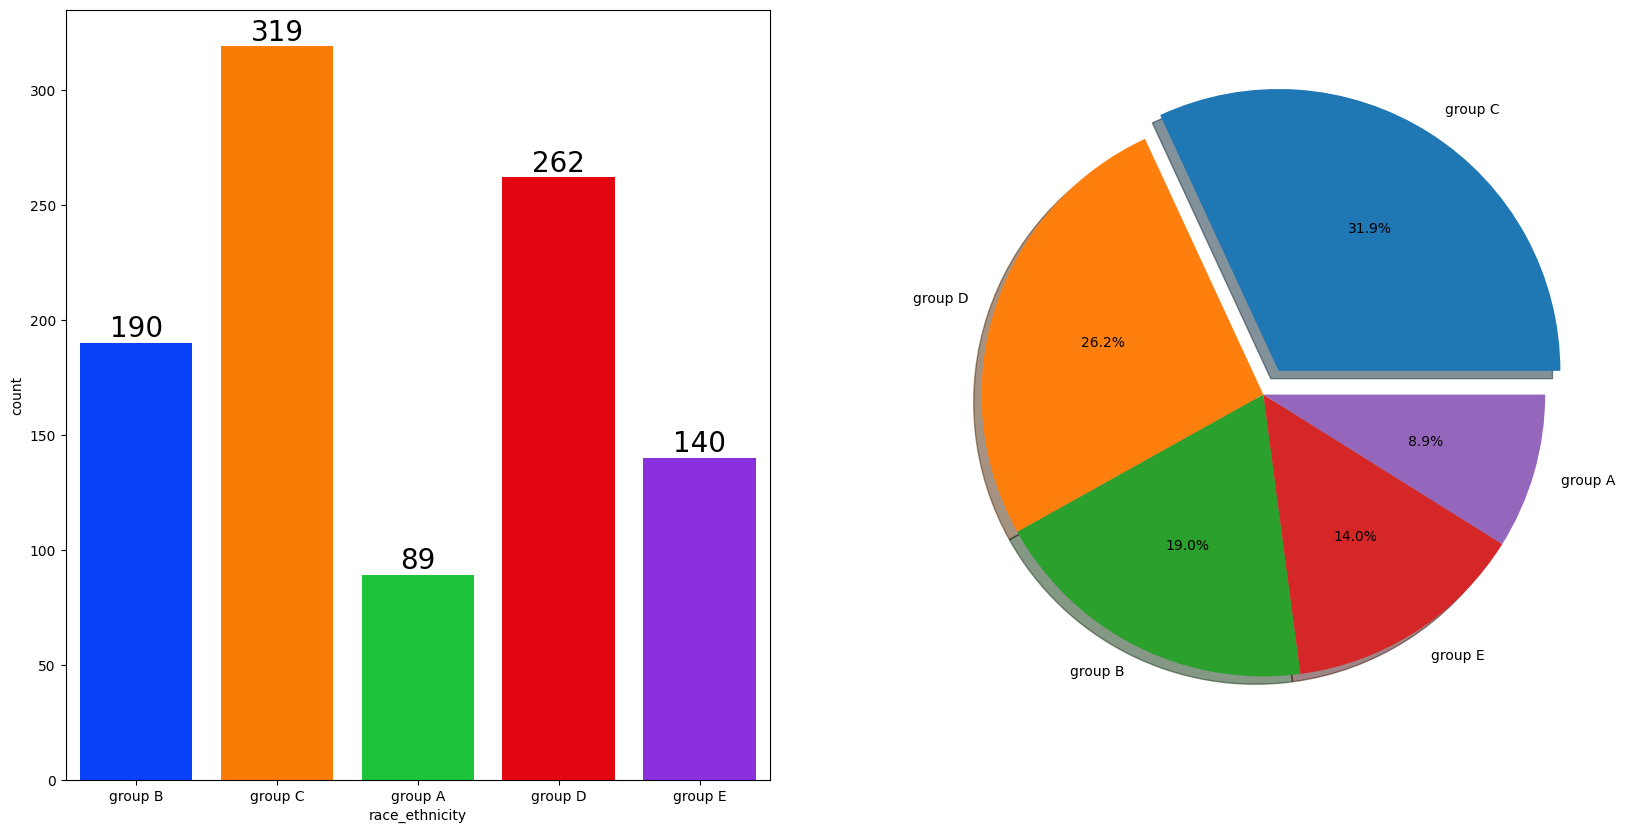

In [57]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

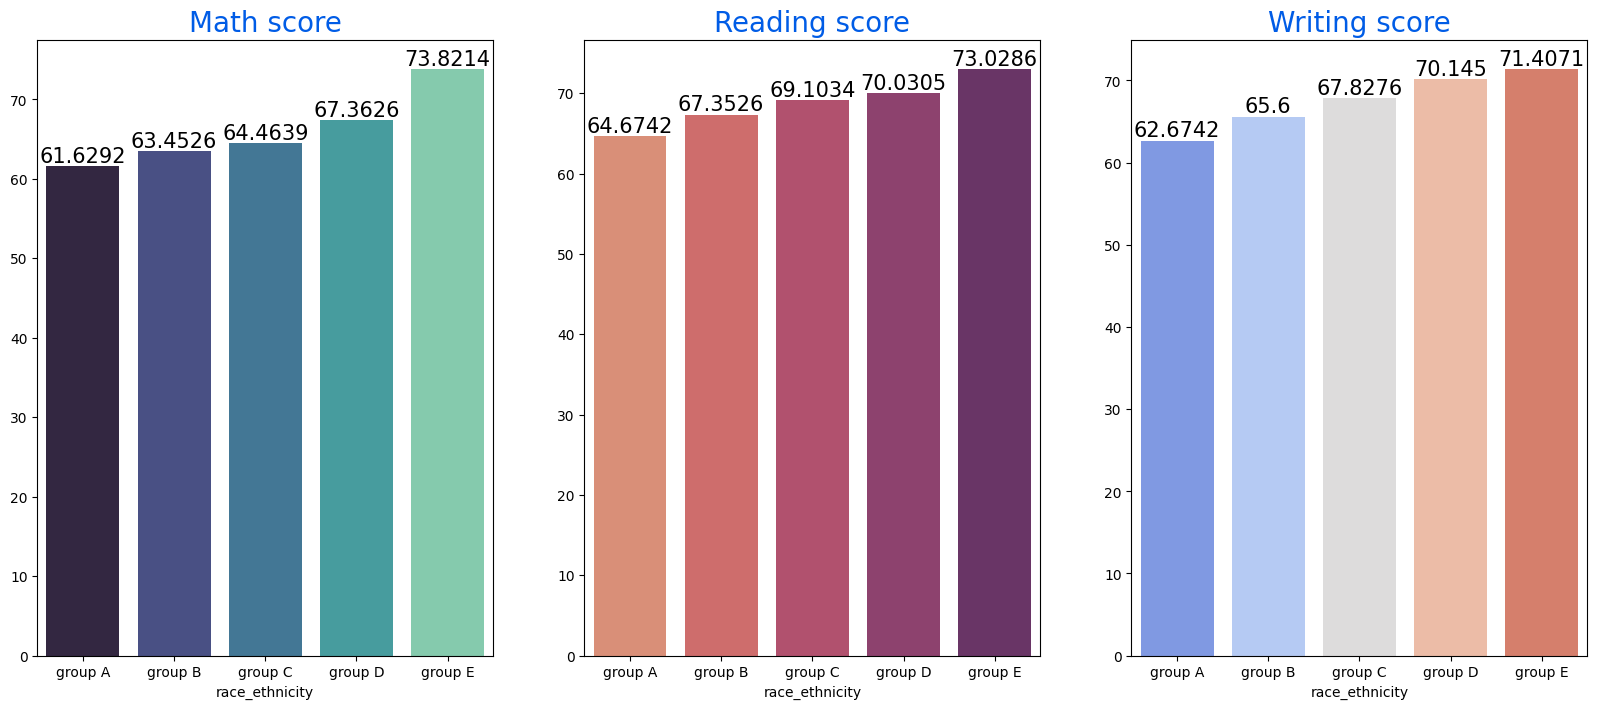

In [59]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

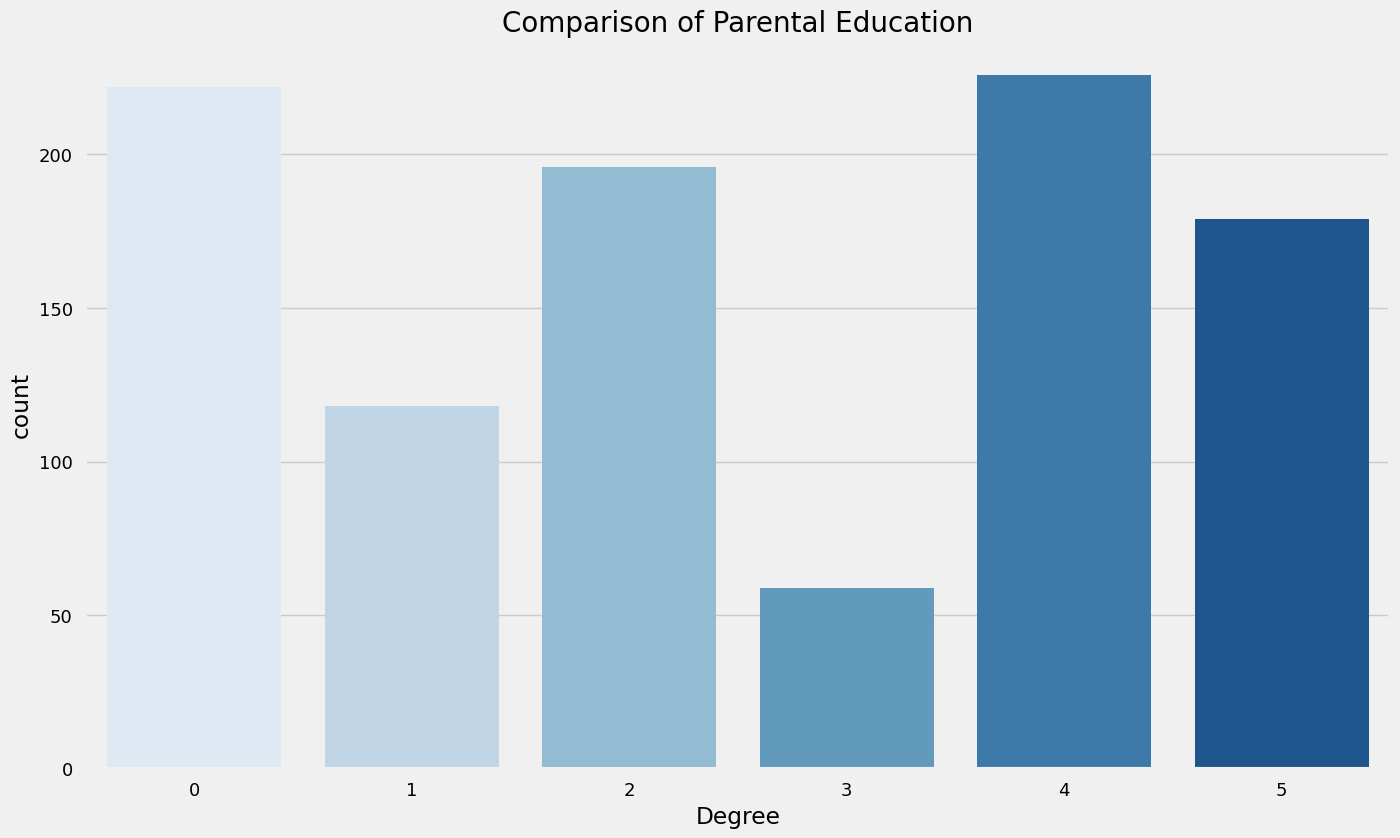

In [76]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x='parental_level_of_education',data=df, palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [73]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,1,standard,none,72,72,74,218,72.666667
1,female,group C,4,standard,completed,69,90,88,247,82.333333
2,female,group B,3,standard,none,90,95,93,278,92.666667
3,male,group A,0,free/reduced,none,47,57,44,148,49.333333
4,male,group C,4,standard,none,76,78,75,229,76.333333


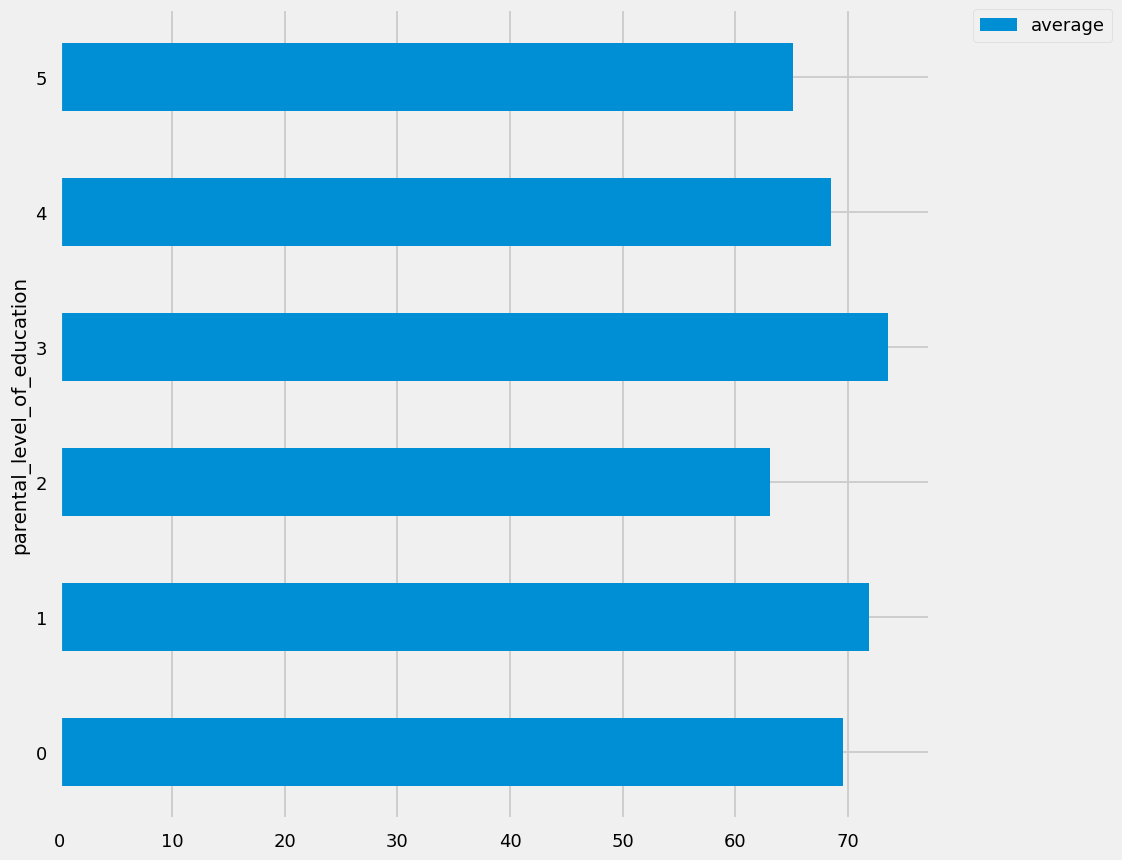

In [74]:
df.groupby('parental_level_of_education')['average'].agg('mean').plot(kind='barh',figsize=(10,10)) #group by parental_level_of_education, Take mean of average column in each 5 groups (count/number of values in each group) and plot the mean for 5 groups seperately
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

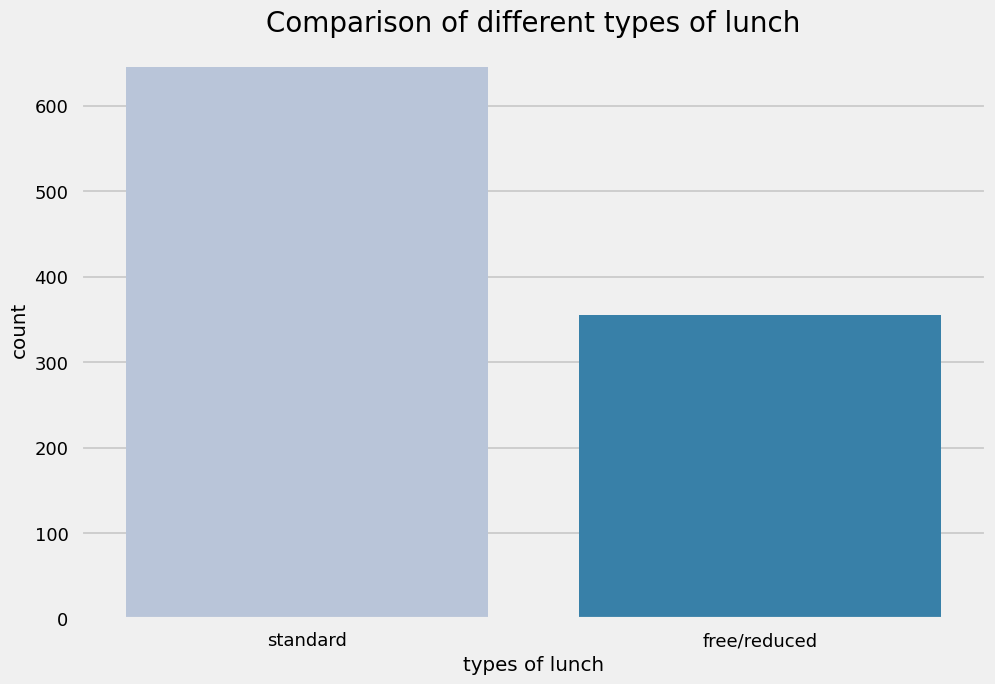

In [65]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk') #This style provides a simple and clean look to the plot with large fonts and prominent grid lines.
sns.countplot(x='lunch',data=df, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

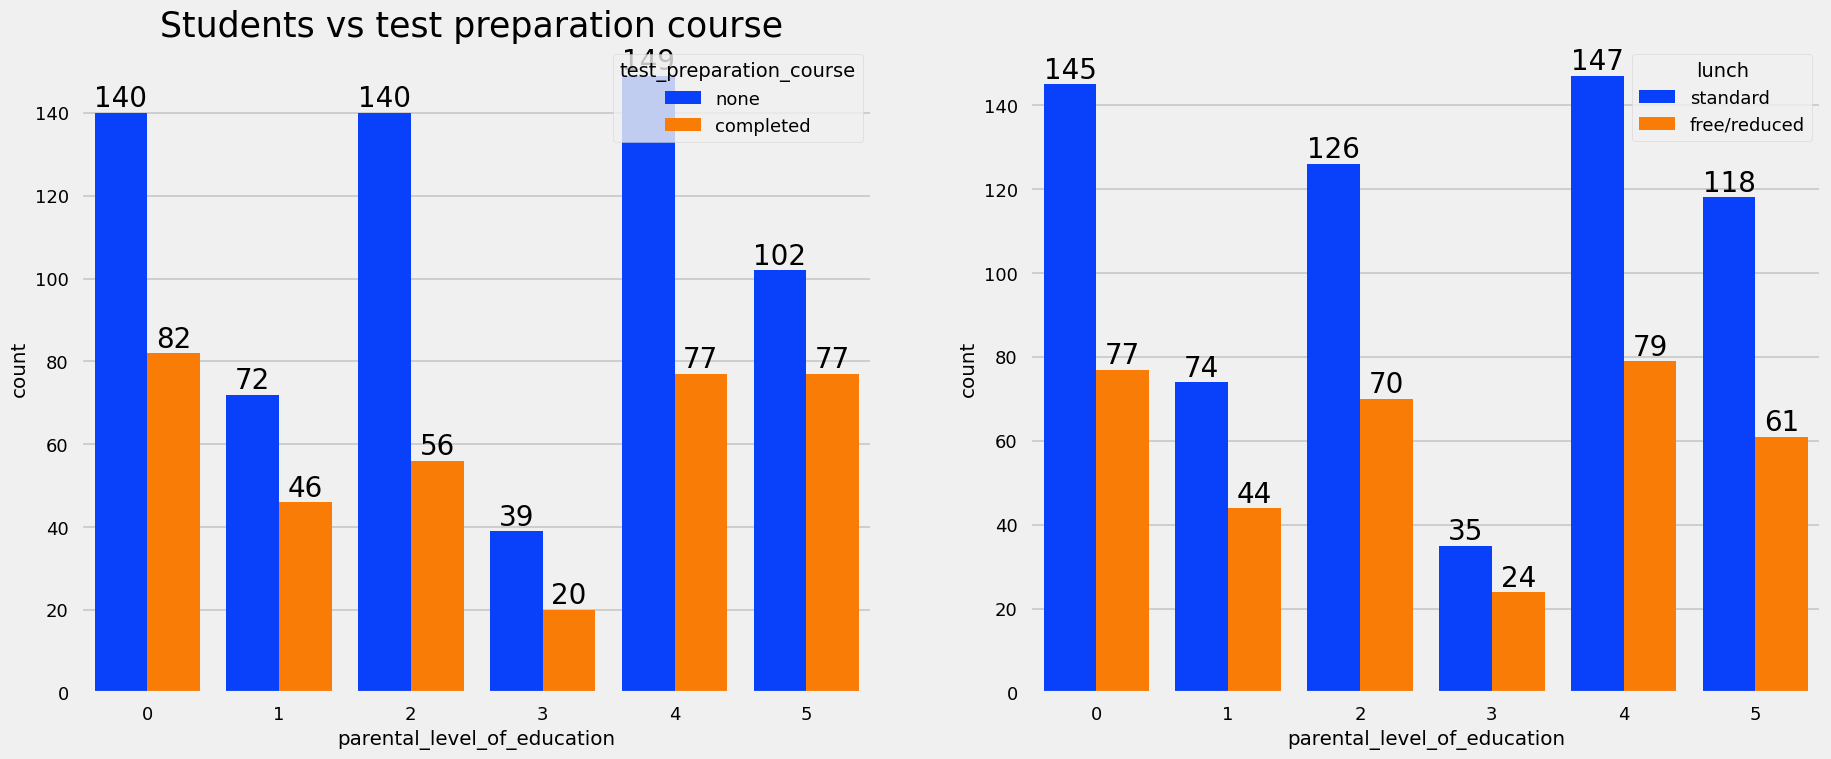

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

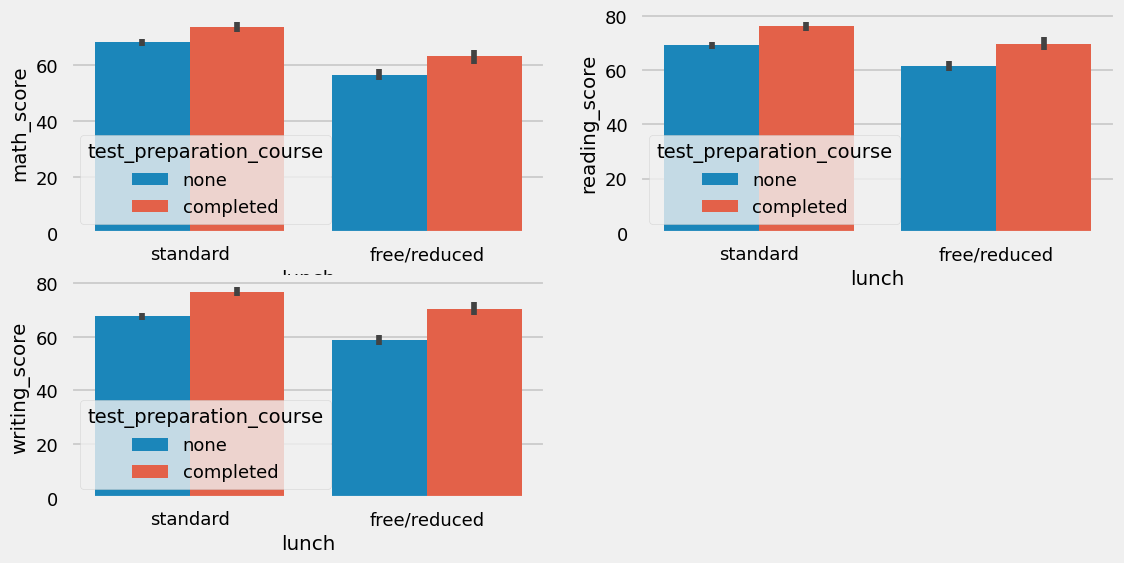

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

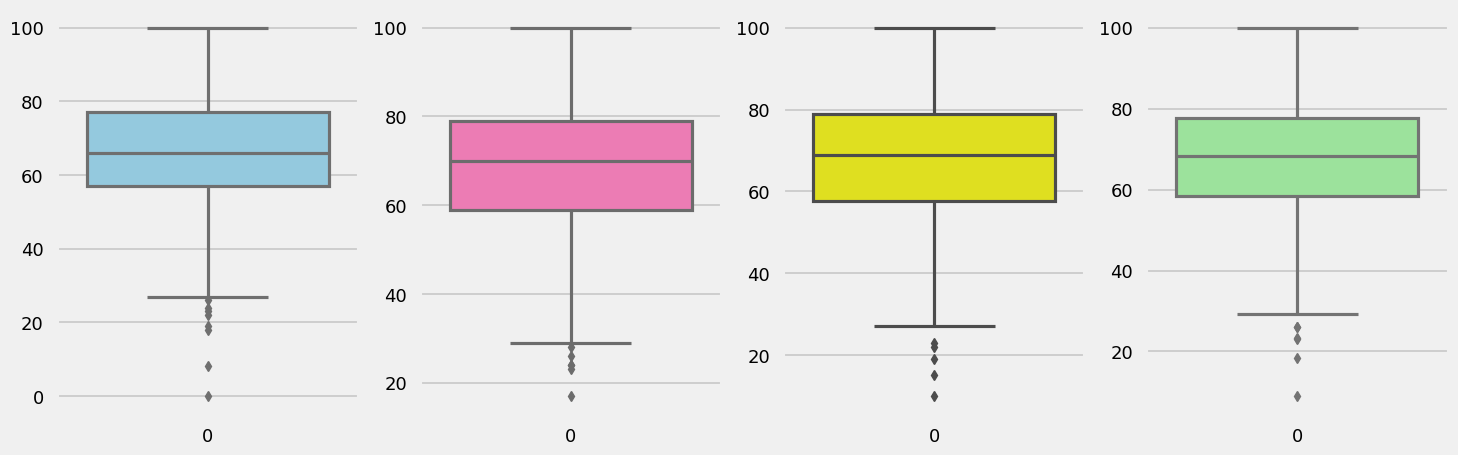

In [70]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

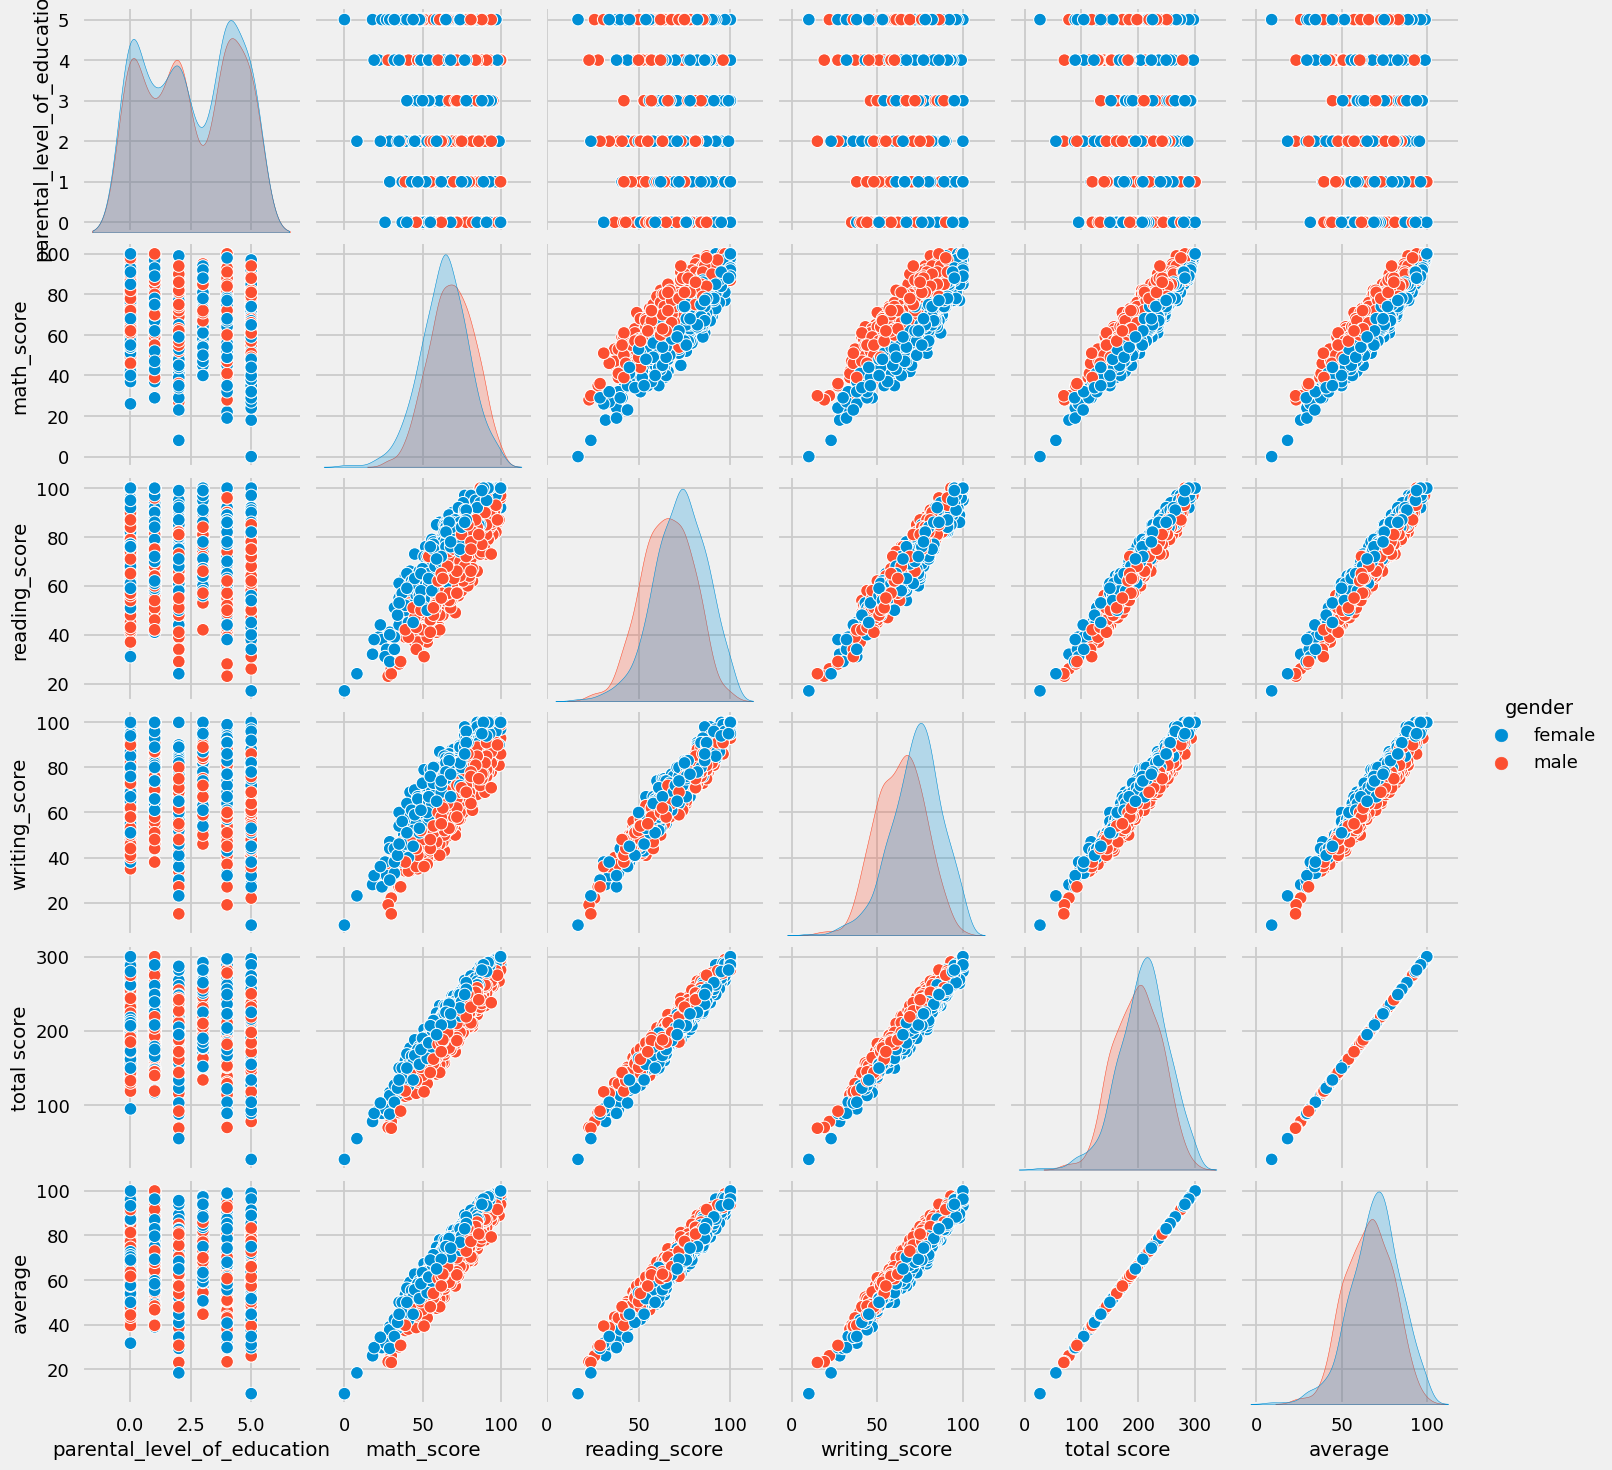

In [71]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.